# <span style="color:red"> Problem: Dataset of three features and one output is given. Predict the line that best fit the dataset.</span>

# <span style="color:red">Dataset preparation</span>

In [1]:
import torch
import matplotlib.pyplot as plt

In [2]:
x = torch.rand(200, 3, dtype=torch.float32)*50

In [3]:
weight = torch.tensor([[1.], [3.], [-2.]])
bias = -5

In [4]:
y = x@weight-bias

In [5]:
# y = 1*x1 + 3*x2 - 2*x3 -5

In [6]:
DS = {'X': x, 'Y': y}

### Description of some keyworks:
```
DS: dictionary of provided dataset x, y. DS['X'] is x, DS['Y'] is y.
LOSS: list of losses in epochs
```

# <span style="color:green"> Answer: </span>

## Custom dataset

In [7]:
from torch.utils.data.dataset import Dataset

class MyCustomDataset(Dataset):
    
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def __getitem__(self, index):
        return self.x[index], self.y[index]

    def __len__(self):
        return len(self.x) # of how many examples(images?) you have

In [8]:
dataset = MyCustomDataset(DS['X'], DS['Y'])

## DataLoader

In [9]:
from torch.utils.data import DataLoader

batch_size = 8

train_loader = DataLoader(dataset, batch_size, shuffle=True)

# Model

In [10]:
class linear_regression(torch.nn.Module):
    
    def __init__(self, input_size, output_size):
        
        super(linear_regression, self).__init__()
        self.linear = torch.nn.Linear(input_size, output_size)

    def forward(self, x):
        
        out = self.linear(x)
        return out

In [11]:
model = linear_regression(3, 1)

# Loss

In [12]:
criterion = torch.nn.MSELoss() 

# Optimizer

In [13]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.00001)

In [14]:
with torch.no_grad():
    y_pred = model(DS['X'])

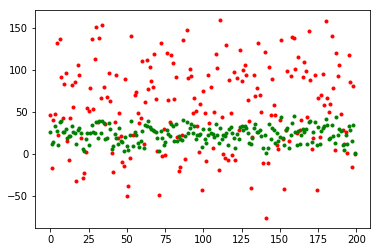

In [15]:
plt.plot(DS['Y'].view(-1).numpy(), 'r.')
plt.plot(y_pred.view(-1).numpy(), 'g.')

In [16]:
LOSS = []
for epoch in range(50):
    sum_loss_in_batch = 0.
    for step, (x, y) in enumerate(train_loader):
        y_hat = model(x)
        loss = criterion(y_hat, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        sum_loss_in_batch += loss.item()
    
    loss_in_epoch = sum_loss_in_batch/batch_size
    
    print(f"Epoch {epoch} loss: {loss_in_epoch}")
    
    LOSS.append(loss_in_epoch)

Epoch 0 loss: 6778.827260971069
Epoch 1 loss: 4494.878917694092
Epoch 2 loss: 3599.25186920166
Epoch 3 loss: 2978.9989280700684
Epoch 4 loss: 2447.6331157684326
Epoch 5 loss: 2028.0320491790771
Epoch 6 loss: 1680.7835960388184
Epoch 7 loss: 1396.9891185760498
Epoch 8 loss: 1156.1400775909424
Epoch 9 loss: 963.6406917572021
Epoch 10 loss: 795.7952404022217
Epoch 11 loss: 662.6210336685181
Epoch 12 loss: 552.0019426345825
Epoch 13 loss: 460.62442779541016
Epoch 14 loss: 382.7749650478363
Epoch 15 loss: 319.7232367992401
Epoch 16 loss: 267.63171207904816
Epoch 17 loss: 223.8205165863037
Epoch 18 loss: 187.8021936416626
Epoch 19 loss: 157.79339385032654
Epoch 20 loss: 133.0367841720581
Epoch 21 loss: 112.15679383277893
Epoch 22 loss: 94.6453572511673
Epoch 23 loss: 80.43760597705841
Epoch 24 loss: 68.66591894626617
Epoch 25 loss: 58.68014645576477
Epoch 26 loss: 50.49634110927582
Epoch 27 loss: 43.680171608924866
Epoch 28 loss: 37.80929809808731
Epoch 29 loss: 33.10062974691391
Epoch 30 lo

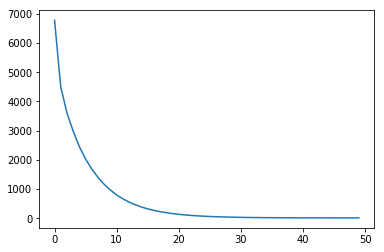

In [17]:
import matplotlib.pyplot as plt
plt.plot(LOSS)

In [18]:
with torch.no_grad():
    y_pred = model(DS['X'])

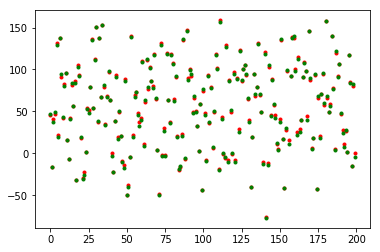

In [19]:
plt.plot(DS['Y'].view(-1).numpy(), 'r.')
plt.plot(y_pred.view(-1).numpy(), 'g.')